# Face Recognition using Eigen Faces
- **Team**: 21 din mein CG double
- **Authors**:
    - Suyash Vardhan Mathur (2019114006)
    - Tushar Choudhary (2019111019)
    - Tejas Chaudhari (2019111013)
    - Rutvij Menavlikar (2019111032)

In [1]:
import os
import numpy as np
import random
from matplotlib import pyplot as plt
import cv2
from PIL import Image

In [2]:
%matplotlib inline
random.seed(142)

## Load Images

In [3]:
dataset_path = 'YaleDataset/'
dataset_dir  = os.listdir(dataset_path)
WIDTH  = 64
HEIGHT = 64
DIM = 1000

In [4]:
def load_images():
    im_size=(WIDTH,HEIGHT)
    training_im, testing_im, training_label, testing_label = [], [], [], []
    types = ["centerlight", "glasses", "happy", "leftlight", "noglasses","normal", "rightlight", "sad", "sleepy", "surprised", "wink"]
    for i in range(1,16):
        im = {}
        testing_type = random.sample(types, 2)
        for t in types:
            im[t] = np.array(Image.open(dataset_path+"subject"+str(i).zfill(2)+"."+t),'uint8')
            im[t] = cv2.resize(im[t], im_size, fx=0.5, fy=0.5, interpolation = cv2.INTER_AREA)
            if t in testing_type:
                testing_im.append(im[t])
                testing_label.append(i)
            else:
                training_im.append(im[t])
                training_label.append(i)
    return np.array(training_im), np.array(training_label), np.array(testing_im), np.array(testing_label)

In [5]:
training_im, training_label, testing_im, testing_label = load_images()

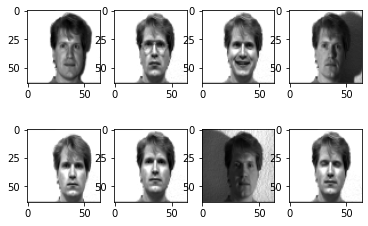

In [6]:
for i in range(min(training_im.shape[0],8)):
    if i<8:
        plt.subplot(2,4,1+i)
        plt.imshow(training_im[i], cmap='gray')
plt.show()

## Get Training Tensor, Mean Face and Normalised Face Vector

In [7]:
training_tensor = training_im.reshape((training_im.shape[0],-1))

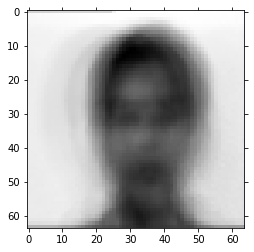

In [8]:
mean_face = np.mean(training_tensor,axis=0)
plt.imshow(mean_face.reshape(HEIGHT, WIDTH), cmap='gray')
plt.tick_params(labelleft='off', labelbottom='off', bottom='off',top='off',right='off',left='off', which='both')
plt.show()

In [9]:
normalised_training_tensor = training_tensor-mean_face

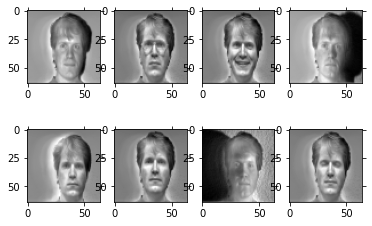

In [10]:
for i in range(min(training_im.shape[0],8)):
    img = normalised_training_tensor[i].reshape(HEIGHT,WIDTH)
    plt.subplot(2,4,1+i)
    plt.imshow(img, cmap='gray')
    plt.tick_params(labelleft='off', labelbottom='off', bottom='off',top='off',right='off',left='off', which='both')
plt.show()

## Eigenvectors and values

In [11]:
cov_matrix = np.cov(normalised_training_tensor) / training_im.shape[0]
print(cov_matrix.shape)
print('Covariance matrix of X: \n%s' %cov_matrix)

(135, 135)
Covariance matrix of X: 
[[ 1.80490554e+01  6.10937243e+00  6.21610914e+00 ... -3.17009137e+00
  -3.29178205e+00  2.06945985e+00]
 [ 6.10937243e+00  1.00649598e+01  9.06999316e+00 ... -2.14603599e-02
  -2.21792666e-01  9.05659737e-01]
 [ 6.21610914e+00  9.06999316e+00  1.07198897e+01 ...  6.34313921e-01
   6.23806349e-01  5.76557546e-01]
 ...
 [-3.17009137e+00 -2.14603599e-02  6.34313921e-01 ...  2.46363799e+01
   2.28943429e+01 -7.03816445e-01]
 [-3.29178205e+00 -2.21792666e-01  6.23806349e-01 ...  2.28943429e+01
   2.44234828e+01 -3.18147283e-01]
 [ 2.06945985e+00  9.05659737e-01  5.76557546e-01 ... -7.03816445e-01
  -3.18147283e-01  1.34685811e+01]]


In [12]:
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)
print('Eigenvectors of Cov(X): \n%s' %eigenvectors)
print('\nEigenvalues of Cov(X): \n%s' %eigenvalues)

Eigenvectors of Cov(X): 
[[-0.06484045+0.j          0.02271007+0.j         -0.04574441+0.j
  ...  0.00678759+0.j         -0.03609393-0.07218025j
  -0.03609393+0.07218025j]
 [-0.02586807+0.j         -0.00019501+0.j         -0.04994809+0.j
  ...  0.00678759+0.j         -0.03609393-0.07218025j
  -0.03609393+0.07218025j]
 [-0.02397221+0.j         -0.00753007+0.j         -0.04642091+0.j
  ...  0.00678759+0.j         -0.03609393-0.07218025j
  -0.03609393+0.07218025j]
 ...
 [ 0.03381419+0.j         -0.09117673+0.j          0.03271617+0.j
  ...  0.00678759+0.j         -0.03609393-0.07218025j
  -0.03609393+0.07218025j]
 [ 0.02982356+0.j         -0.10071192+0.j          0.02857239+0.j
  ...  0.00678759+0.j         -0.03609393-0.07218025j
  -0.03609393+0.07218025j]
 [-0.02019039+0.j         -0.07176294+0.j         -0.03106351+0.j
  ...  0.00678759+0.j         -0.03609393-0.07218025j
  -0.03609393+0.07218025j]]

Eigenvalues of Cov(X): 
[ 1.35040844e+03+0.00000000e+00j  4.87033654e+02+0.00000000e+0

In [13]:
eig_pairs = [(eigenvalues[index], eigenvectors[:,index]) for index in range(eigenvalues.shape[0])]

# Sort the eigen pairs in descending order:
eig_pairs.sort(reverse=True)
eigvalues_sort  = np.array([eig_pairs[index][0] for index in range(eigenvalues.shape[0])])
eigvectors_sort = np.array([eig_pairs[index][1] for index in range(eigenvalues.shape[0])])

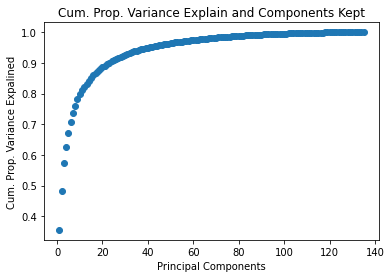

In [20]:
var_comp_sum = np.cumsum(eigvalues_sort) / np.sum(eigvalues_sort)

# x-axis for number of principal components kept
num_comp = np.arange(1,eigenvalues.shape[0]+1)

plt.title('Cum. Prop. Variance Explain and Components Kept')
plt.xlabel('Principal Components')
plt.ylabel('Cum. Prop. Variance Expalined')
plt.scatter(num_comp, np.abs(var_comp_sum))
plt.show()

## Calculate Dimensionality Reduction Matrix

In [15]:
reduced_data = np.array(eigvectors_sort[:DIM]).T
proj_data = (training_tensor.T @ reduced_data).T

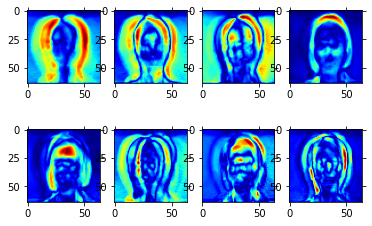

In [16]:
for i in range(min(8,proj_data.shape[0])):
    img = proj_data[i].reshape(HEIGHT,WIDTH)
    plt.subplot(2,4,1+i)
    plt.imshow(np.abs(img), cmap='jet')
    plt.tick_params(labelleft='off', labelbottom='off', bottom='off',top='off',right='off',left='off', which='both')
plt.show()

In [21]:
w = np.array([np.dot(proj_data,i) for i in normalised_training_tensor])

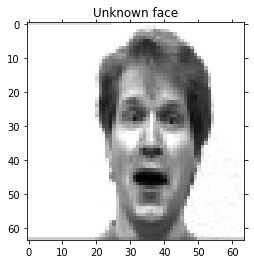

In [41]:
unknown_face = testing_im[1]
unknown_face_vector = np.array(unknown_face, dtype='float64').flatten()

plt.imshow(unknown_face, cmap='gray')
plt.title('Unknown face')
plt.tick_params(labelleft='off', labelbottom='off', bottom='off',top='off',right='off',left='off', which='both')
plt.show()

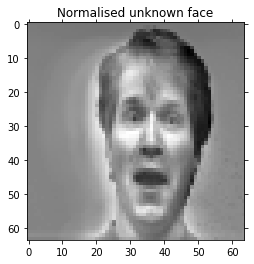

In [42]:
normalised_uface_vector = unknown_face_vector - mean_face

plt.imshow(normalised_uface_vector.reshape(HEIGHT, WIDTH), cmap='gray')
plt.title('Normalised unknown face')
plt.tick_params(labelleft='off', labelbottom='off', bottom='off',top='off',right='off',left='off', which='both')
plt.show()

In [43]:
w_unknown = proj_data @ unknown_face_vector
w_unknown.shape

(135,)

Label of Recognised face in training dataset1, label of testing image 1


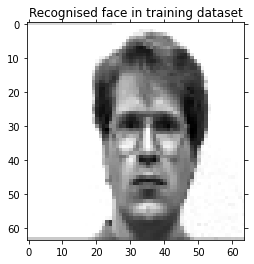

In [48]:
norms = np.linalg.norm(w - w_unknown, axis=1)
print(f"Label of Recognised face in training dataset{training_label[np.argmin(norms)]}, label of testing image {testing_label[1]}")
plt.imshow(training_im[np.argmin(norms)],cmap='gray')
plt.title('Recognised face in training dataset')
plt.tick_params(labelleft='off', labelbottom='off', bottom='off',top='off',right='off',left='off', which='both')
plt.show()

In [51]:
def recogniser(curr_testing_im, curr_testing_label, proj_data, w,t0 = 50532474,t1 = 88836715):
    print(f"For testing image {curr_testing_label}:\n")

    # Recognisation
    unknown_face = curr_testing_im
    unknown_face_vector = np.array(curr_testing_im, dtype='float64').flatten()
    normalised_uface_vector = unknown_face_vector-mean_face
    w_unknown = proj_data @ normalised_uface_vector
    norms = np.linalg.norm(w - w_unknown, axis=1)
    index = np.argmin(norms)

    print(f"Detected image from training images index {index} and distance value {norms[index]}")

    if norms[index] < t1: # It's a face
        if norms[index] < t0: # Face recognised
            print("Face recognised and found in the dataset")
            return training_label[index], training_im[index]
        else:
            print("Face recognised, but did not find it in the dataset")
            return -1, None
    else:     
        print("Face not recognised")
        return -2, None

-------------
For testing image 1:

Detected image from training images index 1 and distance value 4122946.0708997673
Face recognised and found in the dataset


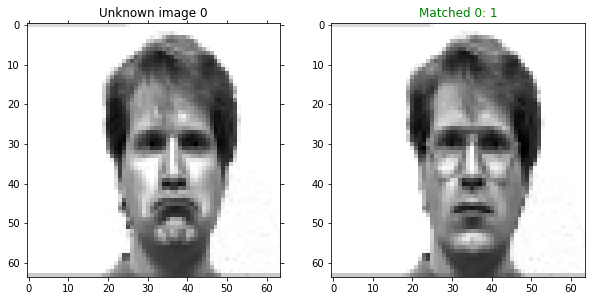

-------------
For testing image 1:

Detected image from training images index 8 and distance value 6911573.1016264055
Face recognised and found in the dataset


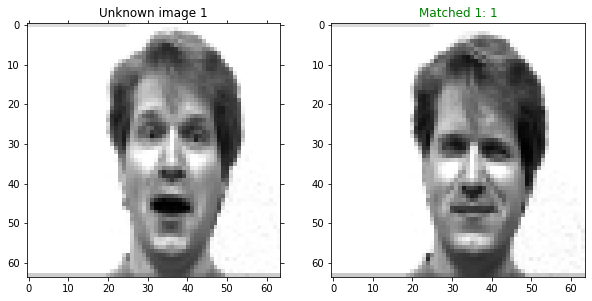

-------------
For testing image 2:

Detected image from training images index 16 and distance value 19928732.93310843
Face recognised and found in the dataset


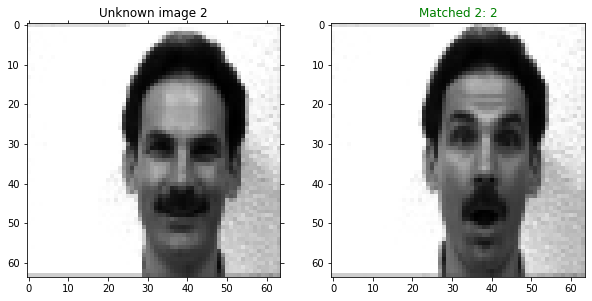

-------------
For testing image 2:

Detected image from training images index 15 and distance value 7396232.974054054
Face recognised and found in the dataset


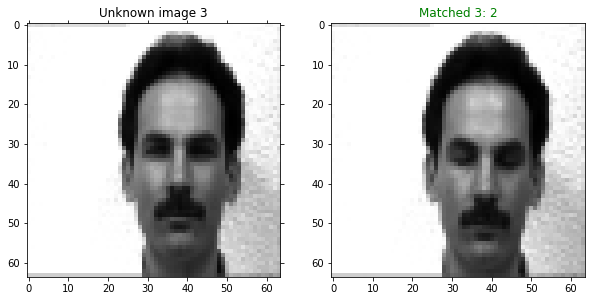

-------------
For testing image 3:

Detected image from training images index 24 and distance value 13054382.445578419
Face recognised and found in the dataset


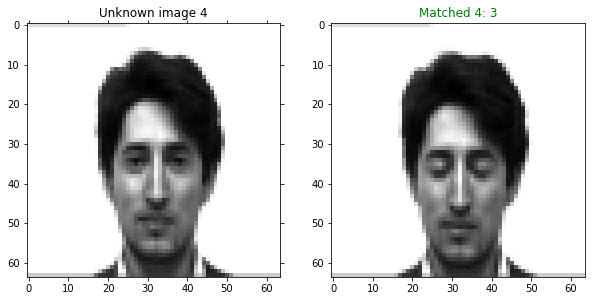

-------------
For testing image 3:

Detected image from training images index 24 and distance value 13054382.445578419
Face recognised and found in the dataset


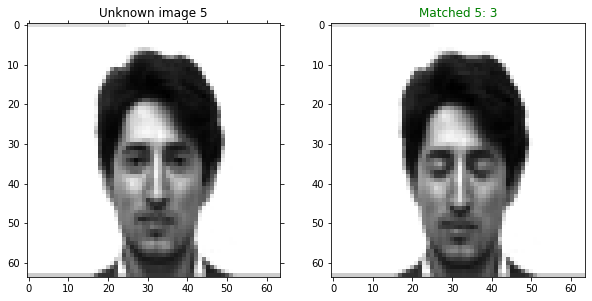

-------------
For testing image 4:

Detected image from training images index 35 and distance value 22867834.104386333
Face recognised and found in the dataset


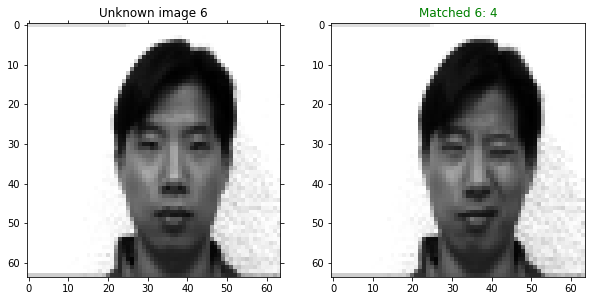

-------------
For testing image 4:

Detected image from training images index 32 and distance value 0.0
Face recognised and found in the dataset


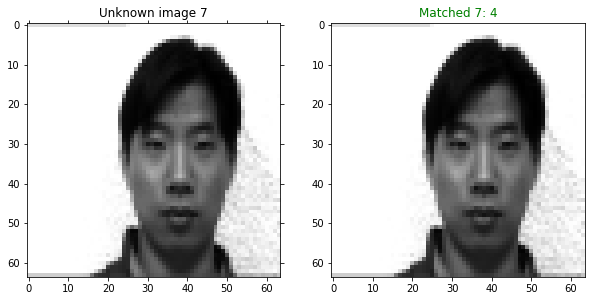

-------------
For testing image 5:

Detected image from training images index 43 and distance value 10465137.456298871
Face recognised and found in the dataset


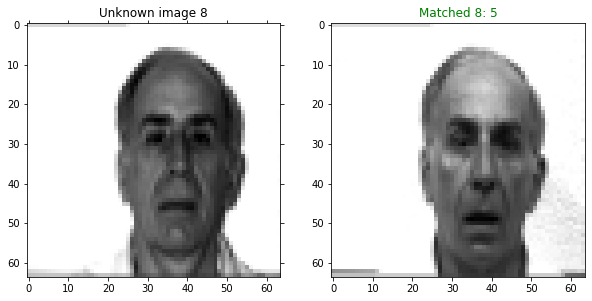

-------------
For testing image 5:

Detected image from training images index 36 and distance value 3834865.8257289673
Face recognised and found in the dataset


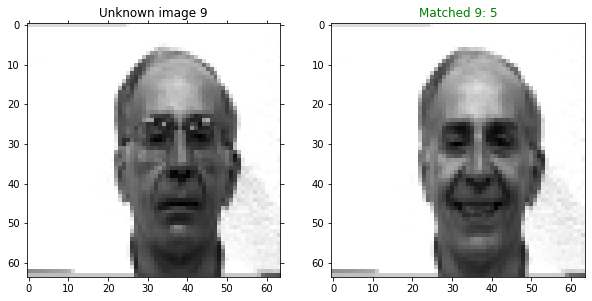

-------------
For testing image 6:

Detected image from training images index 48 and distance value 5840562.176933571
Face recognised and found in the dataset


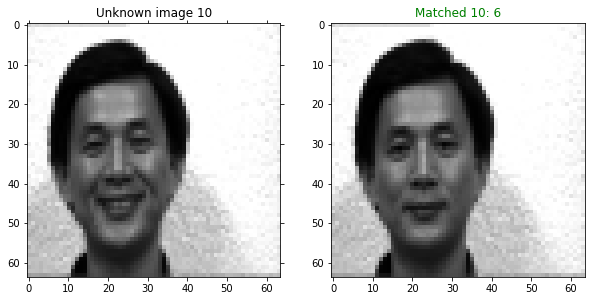

-------------
For testing image 6:

Detected image from training images index 48 and distance value 0.0
Face recognised and found in the dataset


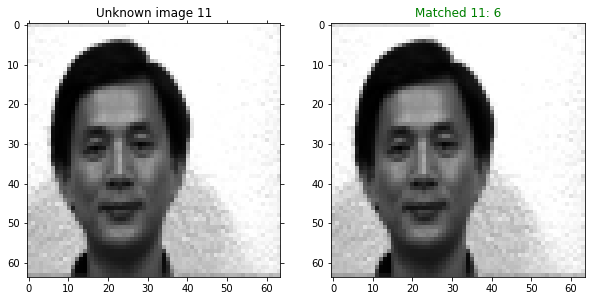

-------------
For testing image 7:

Detected image from training images index 58 and distance value 2802743.9895285876
Face recognised and found in the dataset


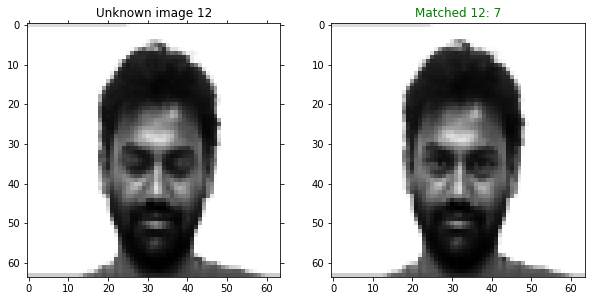

-------------
For testing image 7:

Detected image from training images index 55 and distance value 14845269.900892276
Face recognised and found in the dataset


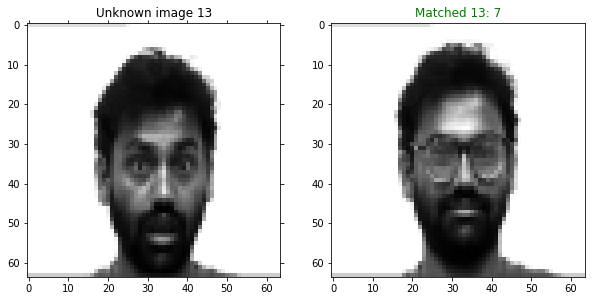

-------------
For testing image 8:

Detected image from training images index 57 and distance value 47479468.62624657
Face recognised and found in the dataset
-------------
For testing image 8:

Detected image from training images index 134 and distance value 23481824.539330494
Face recognised and found in the dataset
-------------
For testing image 9:

Detected image from training images index 1 and distance value 87315689.131066
Face recognised, but did not find it in the dataset


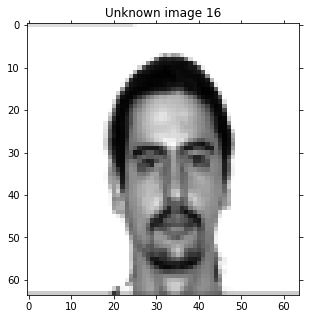

-------------
For testing image 9:

Detected image from training images index 79 and distance value 8192858.070059223
Face recognised and found in the dataset


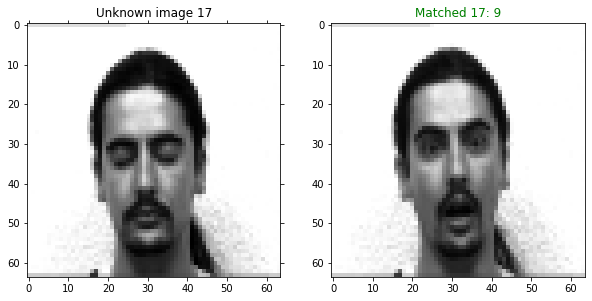

-------------
For testing image 10:

Detected image from training images index 30 and distance value 32886370.968025807
Face recognised and found in the dataset
-------------
For testing image 10:

Detected image from training images index 83 and distance value 3730279.226655669
Face recognised and found in the dataset


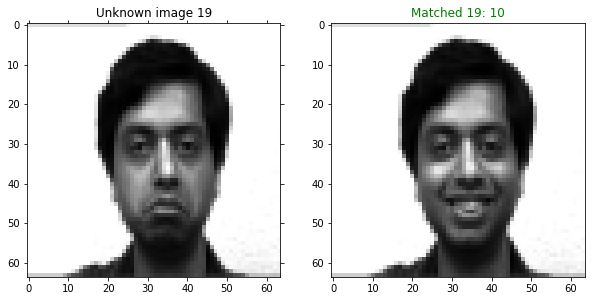

-------------
For testing image 11:

Detected image from training images index 96 and distance value 16079444.85514386
Face recognised and found in the dataset


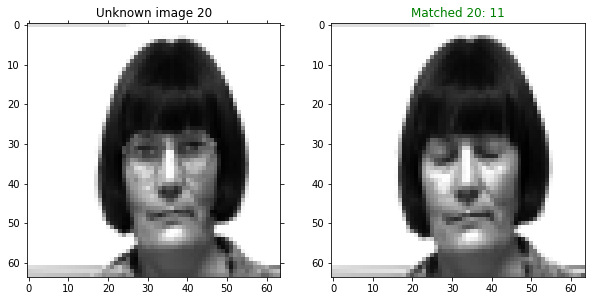

-------------
For testing image 11:

Detected image from training images index 91 and distance value 10855351.489955913
Face recognised and found in the dataset


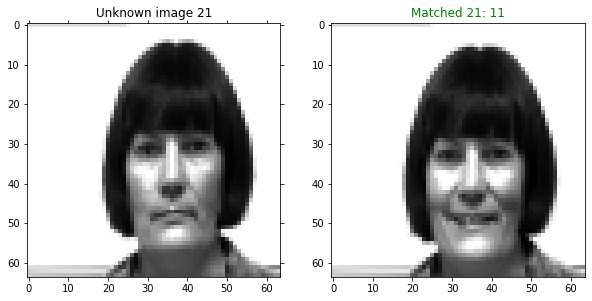

-------------
For testing image 12:

Detected image from training images index 103 and distance value 0.0
Face recognised and found in the dataset


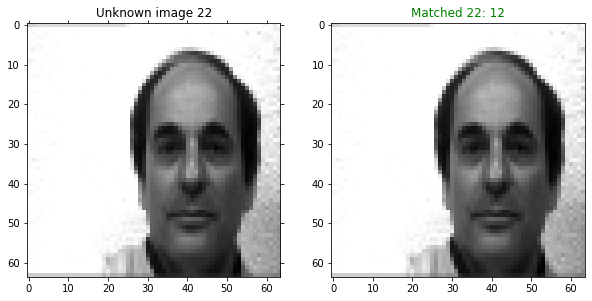

-------------
For testing image 12:

Detected image from training images index 105 and distance value 19345727.20906678
Face recognised and found in the dataset


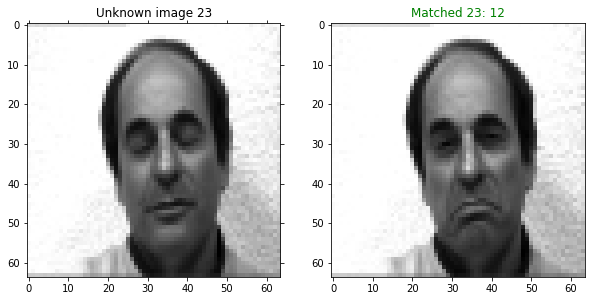

-------------
For testing image 13:

Detected image from training images index 114 and distance value 5042821.453318613
Face recognised and found in the dataset


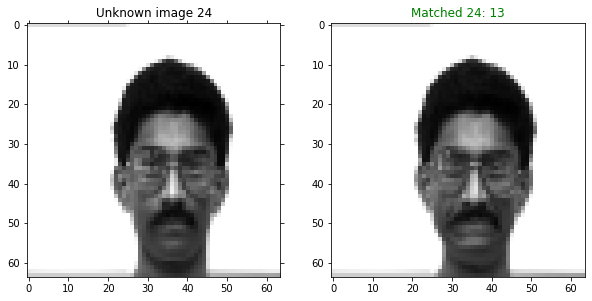

-------------
For testing image 13:

Detected image from training images index 112 and distance value 8968440.946616422
Face recognised and found in the dataset


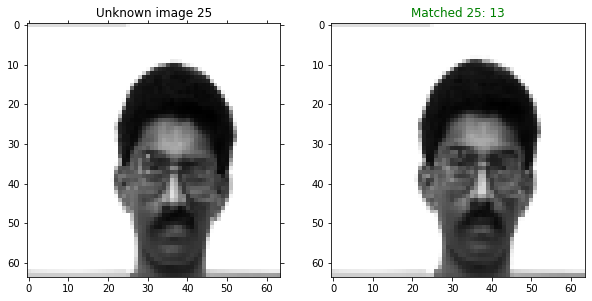

-------------
For testing image 14:

Detected image from training images index 45 and distance value 32595331.169259924
Face recognised and found in the dataset
-------------
For testing image 14:

Detected image from training images index 117 and distance value 22387121.734441098
Face recognised and found in the dataset


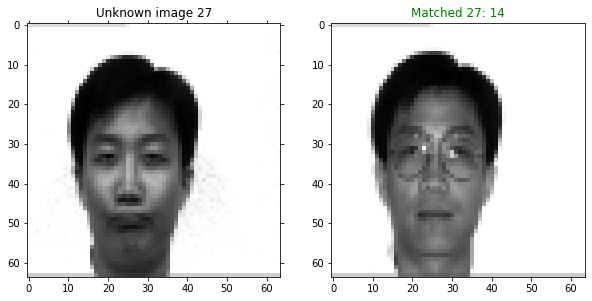

-------------
For testing image 15:

Detected image from training images index 131 and distance value 8050353.162094152
Face recognised and found in the dataset


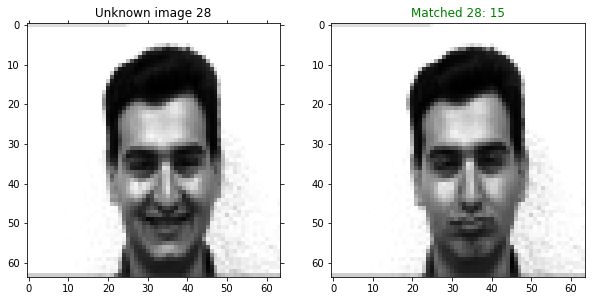

-------------
For testing image 15:

Detected image from training images index 132 and distance value 3685858.9045986272
Face recognised and found in the dataset


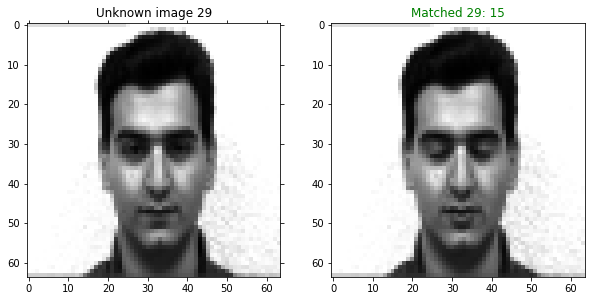

-------------


In [53]:
ROW_SIZE = 5
correct_pred = 0
print("-------------")
for idx, curr_testing_im in enumerate(testing_im):
    label, im = recogniser(curr_testing_im, testing_label[idx], proj_data, w)
    if label == testing_label[idx]:
        correct_pred += 1
    if label >= 0:
        if label == testing_label[idx]:
            fig,ax = plt.subplots(ncols=2,figsize=(ROW_SIZE*2,ROW_SIZE))
            ax[0].imshow(curr_testing_im, cmap='gray')
            ax[0].set_title(f'Unknown image {idx}')
            ax[0].tick_params(labelleft='off', labelbottom='off', bottom='off',top='off',right='on',left='off', which='both')
            ax[1].set_title(f'Matched {idx}: {label}', color='g')
            ax[1].imshow(im, cmap='gray')
    else:
        plt.figure(figsize=(ROW_SIZE,ROW_SIZE))
        plt.imshow(curr_testing_im, cmap='gray')
        plt.title(f'Unknown image {idx}')
        plt.tick_params(labelleft='off', labelbottom='off', bottom='off',top='off',right='on',left='off', which='both')
    plt.show()
    print("-------------")

In [54]:
print('Correct predictions: {}/{} = {}%'.format(correct_pred, testing_im.shape[0], correct_pred/testing_im.shape[0]*100))

Correct predictions: 25/30 = 83.33333333333334%


In [38]:
im_size=(64,64)
new_testing_im=[]
new_testing_label=[]
for i in os.listdir("YaleDataset/testing_set"):
    im = np.array(Image.open("YaleDataset/testing_set/"+i),'uint8')
    if len(im.shape) == 3:
        im = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
    im = cv2.resize(im, im_size, fx=0.5, fy=0.5, interpolation = cv2.INTER_AREA)
    new_testing_im.append(im)
    new_testing_label.append(i.split(".")[0])
new_testing_im=np.array(new_testing_im)
new_testing_label=np.array(new_testing_label)

-1
59553017.70999525
Unknown face!
Predicted correctly :)


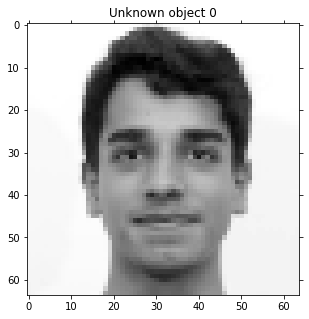

-1
59687096.83846732
Unknown face!
Predicted correctly :)


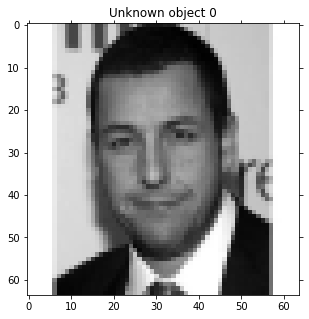

-2
92837149.30711667
Not a face!
Predicted correctly :)


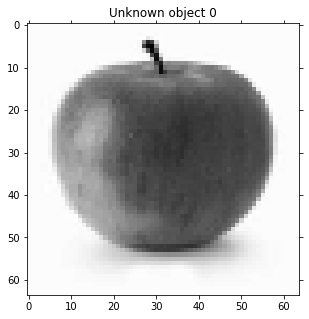

-1
75643590.64659172
Unknown face!
Predicted correctly :)


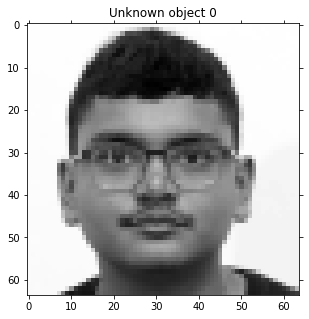

-1
53360745.824379474
Unknown face!
Predicted correctly :)


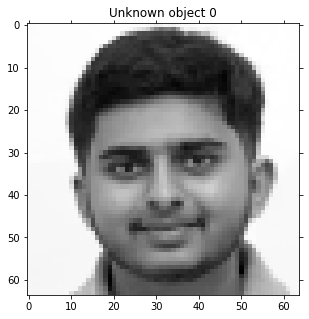

-1
79770527.7388162
Unknown face!
Predicted correctly :)


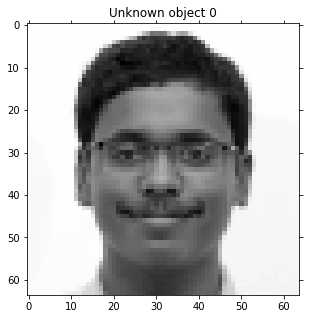

In [40]:
for idx, img in enumerate(new_testing_im):
    recogniser(img, new_testing_label[idx], proj_data, w)